In [2]:
# import pandas as pd
# df = pd.read_parquet('s3://sagemaker-us-east-2-534295958235/McAllister_RocketShare_CurrentScores.parquet')

# df.head()

In [3]:
from IPython.display import clear_output

In [4]:
! pip install -U tensorflow sklearn --index-url https://private.artifactory.foc.zone/api/pypi/rdf-pypi-virtual/simple --extra-index-url https://private.artifactory.foc.zone/artifactory/api/pypi/pypi-remote/simple
clear_output(wait=True)

Looking in indexes: https://private.artifactory.foc.zone/api/pypi/rdf-pypi-virtual/simple, https://private.artifactory.foc.zone/artifactory/api/pypi/pypi-remote/simple
  Using cached https://private.artifactory.foc.zone/artifactory/api/pypi/pypi-remote/packages/packages/46/1c/395a83ee7b2d2ad7a05b453872053d41449564477c81dc356f720b16eac4/sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of y

Text(0, 0.5, 'Feature 2')

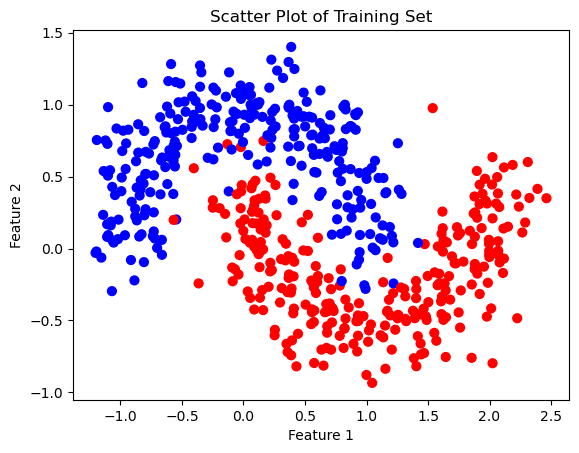

In [5]:
import numpy as np
import sklearn
from sklearn import datasets
from sklearn import linear_model
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier



import numpy as np
from sklearn.model_selection import train_test_split

# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(800, noise=0.20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Plot the training set
plt.scatter(X_train[:,0], X_train[:,1], s=40, c=y_train, cmap='bwr');
plt.title('Scatter Plot of Training Set');
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

/tmp/ipykernel_11495/1049802242.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_test[:,0], X_test[:,1], s=40, cmap='bwr');


Text(0, 0.5, 'Feature 2')

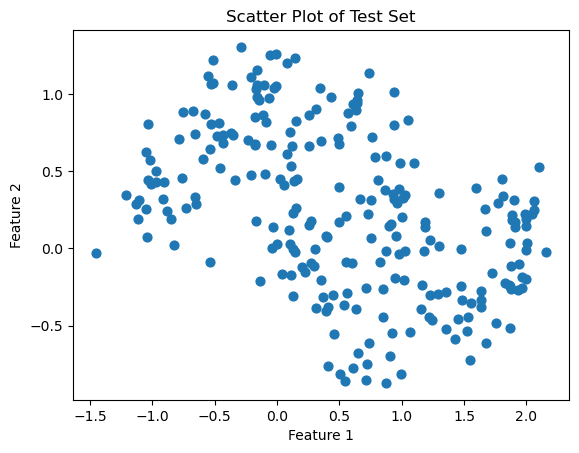

In [6]:
# plt.scatter(X_test[:,0], X_test[:,1], s=40, c=y_test, cmap='bwr');
plt.scatter(X_test[:,0], X_test[:,1], s=40, cmap='bwr');
plt.title('Scatter Plot of Test Set');
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

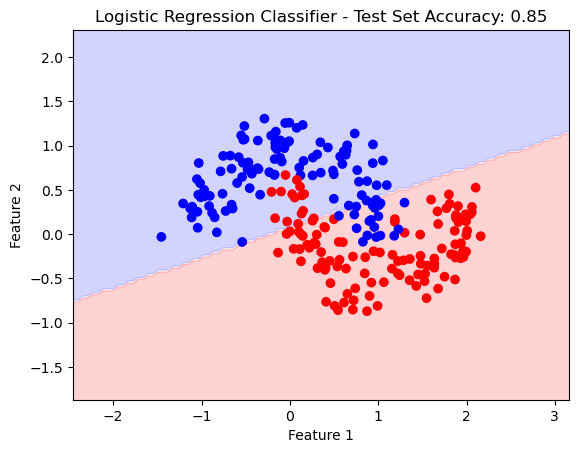

In [7]:
from sklearn import linear_model
import sklearn
from sklearn import datasets
from sklearn import linear_model
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


# Train model
lr = sklearn.linear_model.LogisticRegressionCV()
lr.fit(X_train, y_train)

# Get Predictions
pred_scores = lr.predict_proba(X_test)[:, 1]
pred_classes = np.where(lr.predict_proba(X_test)[:, 1] >= .50, 1, 0)

disp = DecisionBoundaryDisplay.from_estimator(
    lr, X_test, response_method="predict",
    xlabel='Feature 1', ylabel='Feature 2',
    alpha=0.2, cmap="bwr"
)
disp.ax_.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="bwr")

# Format and print accuracy
acc = accuracy_score(y_test, pred_classes, normalize=True)
acc_message = 'Test Set Accuracy: ' + str(acc)

plt.title('Logistic Regression Classifier - ' + acc_message)

plt.show()

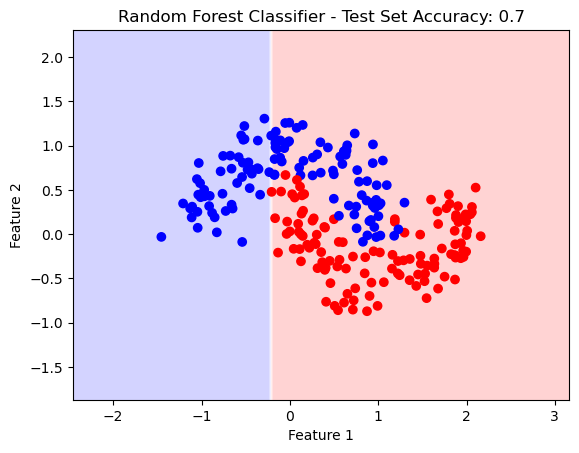

In [8]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(800, noise=0.20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Train Model
rf = RandomForestClassifier(max_depth=2, random_state=0, n_estimators = 1)
rf.fit(X_train, y_train)

# Get Predictions
pred_scores = rf.predict_proba(X_test)[:, 1]
pred_classes = np.where(rf.predict_proba(X_test)[:, 1] >= .50, 1, 0)

disp = DecisionBoundaryDisplay.from_estimator(
    rf, X_test, response_method="predict",
    xlabel='Feature 1', ylabel='Feature 2',
    alpha=0.2, cmap="bwr"
)
disp.ax_.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="bwr")

# Format and print accuracy
acc = accuracy_score(y_test, pred_classes, normalize=True)
acc_message = 'Test Set Accuracy: ' + str(round(acc, 2))

plt.title('Random Forest Classifier - ' + acc_message)

plt.show()

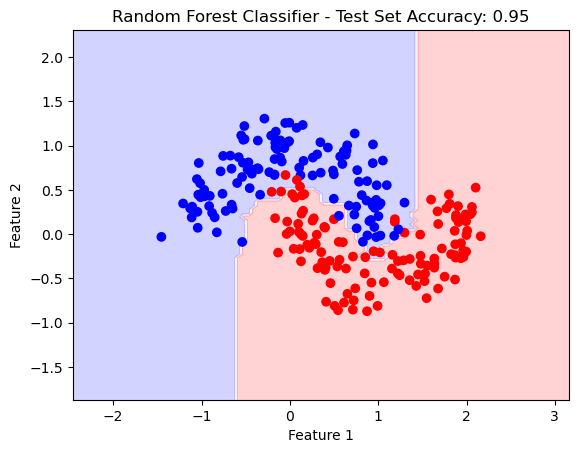

In [9]:
# Train Model
rf = RandomForestClassifier(max_depth=40, random_state=0, n_estimators = 60)
rf.fit(X_train, y_train)

# Get Predictions
pred_scores = rf.predict_proba(X_test)[:, 1]
pred_classes = np.where(rf.predict_proba(X_test)[:, 1] >= .50, 1, 0)

disp = DecisionBoundaryDisplay.from_estimator(
    rf, X_test, response_method="predict",
    xlabel='Feature 1', ylabel='Feature 2',
    alpha=0.2, cmap="bwr"
)
disp.ax_.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="bwr")

# Format and print accuracy
acc = accuracy_score(y_test, pred_classes, normalize=True)
acc_message = 'Test Set Accuracy: ' + str(acc)

plt.title('Random Forest Classifier - ' + acc_message)

plt.show()

In [10]:
clear_output(wait=True)

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from keras.layers import LeakyReLU

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)


# Ensure your labels are one-hot encoded
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Adjust the output layer to have 2 units for 2 classes
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),  # First hidden layer
    Dense(32, activation='relu'),  # Second hidden layer
    Dense(2, activation='softmax')  # Output layer with 2 units for 2 classes
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# print(f'Test Loss: {test_loss}')
# print(f'Test Accuracy: {test_accuracy}')

# Optionally, get a detailed classification report
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true_classes = y_test.argmax(axis=1)

# print(classification_report(y_true_classes, y_pred_classes))

clear_output(wait=True)

2024-08-27 13:49:24.017195: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-27 13:49:24.027924: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-27 13:49:24.046297: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-27 13:49:24.075551: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-27 13:49:24.082078: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-27 13:49:24.099288: I tensorflow/core/platform/cpu_feature_gu

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.4234 - loss: 0.6925 - val_accuracy: 0.8150 - val_loss: 0.5934
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8052 - loss: 0.5697 - val_accuracy: 0.8250 - val_loss: 0.5044
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8429 - loss: 0.4717 - val_accuracy: 0.8250 - val_loss: 0.4398
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8366 - loss: 0.4038 - val_accuracy: 0.8300 - val_loss: 0.3946
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8622 - loss: 0.3464 - val_accuracy: 0.8350 - val_loss: 0.3661
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8368 - loss: 0.3458 - val_accuracy: 0.8400 - val_loss: 0.3471
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8749 - loss: 0.3144 - val_accuracy: 0.8500 - val_loss: 0.3345
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8651 - loss: 0.2901 - val_accuracy: 0.8625 - val_loss: 0.3238
E

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 43s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


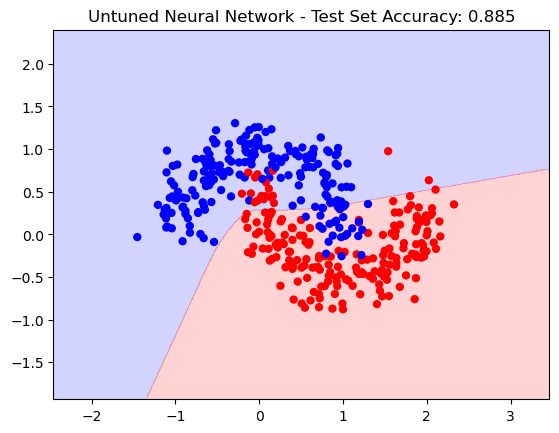

In [12]:
import matplotlib.cm
cmap = plt.get_cmap('bwr')

# Define region of interest by data limits
xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
steps = 1000
x_span = np.linspace(xmin, xmax, steps)
y_span = np.linspace(ymin, ymax, steps)
xx, yy = np.meshgrid(x_span, y_span)

# Make predictions across region of interest
labels = model.predict(np.c_[xx.ravel(), yy.ravel()])
labels_class = np.where(labels[:, 1] >= .50, 1, 0)

# Plot decision boundary in region of interest
z = labels_class.reshape(xx.shape)

fig, ax = plt.subplots()
ax.contourf(xx, yy, z, cmap=cmap, alpha=0.2)

# Get predicted labels on training data and plot
train_labels = model.predict(X_test)
plt.title('Untuned Neural Network - Test Set Accuracy: ' + str(round(test_accuracy, 3)))
ax.scatter(X_test[:,0], X_test[:,1], c=y_test[:, 1], cmap=cmap, lw=0);

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Ensure your labels are one-hot encoded
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Adjust the output layer to have 2 units for 2 classes

# Added additional layer AND # of neurons per layer
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'), # added this
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')  # 
])

# Compile the model
# Decreased the learning rate
model.compile(optimizer=Adam(learning_rate=0.007), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
# Also decreased # of epochs...
history = model.fit(X_train, y_train, epochs=11, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# print(f'Test Loss: {test_loss}')
# print(f'Test Accuracy: {test_accuracy}')

# Optionally, get a detailed classification report
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true_classes = y_test.argmax(axis=1)

# print(classification_report(y_true_classes, y_pred_classes))
clear_output(wait=True)

Epoch 1/11
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7311 - loss: 0.5094 - val_accuracy: 0.8575 - val_loss: 0.3124
Epoch 2/11
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9100 - loss: 0.2486 - val_accuracy: 0.8750 - val_loss: 0.2863
Epoch 3/11
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9201 - loss: 0.2033 - val_accuracy: 0.8850 - val_loss: 0.2470
Epoch 4/11
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9340 - loss: 0.1701 - val_accuracy: 0.9175 - val_loss: 0.1973
Epoch 5/11
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9464 - loss: 0.1304 - val_accuracy: 0.9550 - val_loss: 0.1528
Epoch 6/11
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9813 - loss: 0.0637 - val_accuracy: 0.9350 - val_loss: 0.1903
Epoch 7/11
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9779 - loss: 0.0766 - val_accuracy: 0.9425 - val_loss: 0.1893
Epoch 8/11
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9856 - loss: 0.0428 - val_accuracy: 0.9500 - val_loss

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 43s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


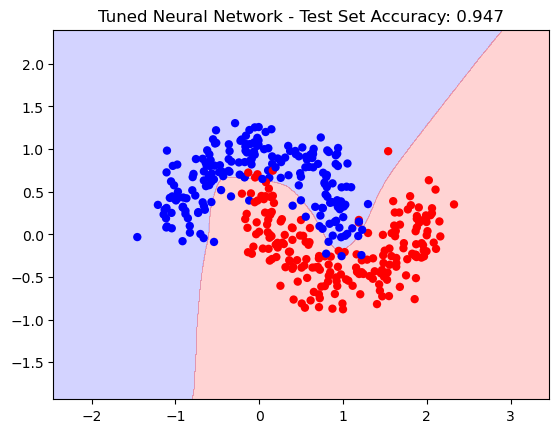

In [14]:
import matplotlib.cm
cmap = plt.get_cmap('bwr')

# Define region of interest by data limits
xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
steps = 1000
x_span = np.linspace(xmin, xmax, steps)
y_span = np.linspace(ymin, ymax, steps)
xx, yy = np.meshgrid(x_span, y_span)

# Make predictions across region of interest
labels = model.predict(np.c_[xx.ravel(), yy.ravel()])
labels_class = np.where(labels[:, 1] >= .50, 1, 0)

# Plot decision boundary in region of interest
z = labels_class.reshape(xx.shape)

fig, ax = plt.subplots()
ax.contourf(xx, yy, z, cmap=cmap, alpha=0.2)

# Get predicted labels on training data and plot
train_labels = model.predict(X_test)
plt.title('Tuned Neural Network - Test Set Accuracy: ' + str(round(test_accuracy, 3)))
ax.scatter(X_test[:,0], X_test[:,1], c=y_test[:, 1], cmap=cmap, lw=0);

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Ensure your labels are one-hot encoded
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Adjust the output layer to have 2 units for 2 classes

# Added additional layer AND # of neurons per layer
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'), # added this layer
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'), # added this layer
    Dense(2, activation='softmax')  # Adjust output layer as needed
])

# Compile the model
# Decreased the learning rate (from 0.001 to 0.007
model.compile(optimizer=Adam(learning_rate=0.007), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
# Also decreased # of epochs to reduce the risk of the large learning rate over-shooting the minimum
history = model.fit(X_train, y_train, epochs=7, batch_size=15, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# print(f'Test Loss: {test_loss}')
# print(f'Test Accuracy: {test_accuracy}')

# Optionally, get a detailed classification report
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true_classes = y_test.argmax(axis=1)

# print(classification_report(y_true_classes, y_pred_classes))
clear_output(wait=True)

Epoch 1/7
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7256 - loss: 0.5199 - val_accuracy: 0.8650 - val_loss: 0.3107
Epoch 2/7
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8798 - loss: 0.2530 - val_accuracy: 0.9150 - val_loss: 0.2195
Epoch 3/7
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9253 - loss: 0.1769 - val_accuracy: 0.9325 - val_loss: 0.1720
Epoch 4/7
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9584 - loss: 0.0958 - val_accuracy: 0.9450 - val_loss: 0.1921
Epoch 5/7
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9586 - loss: 0.1530 - val_accuracy: 0.9600 - val_loss: 0.1299
Epoch 6/7
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9688 - loss: 0.0954 - val_accuracy: 0.9475 - val_loss: 0.1627
Epoch 7/7
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9723 - loss: 0.0726 - val_accuracy: 0.9575 - val_loss: 0.1374
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9691 - loss: 0.1036 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


31250/31250 ━━━━━━━━━━━━━━━━━━━━ 47s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


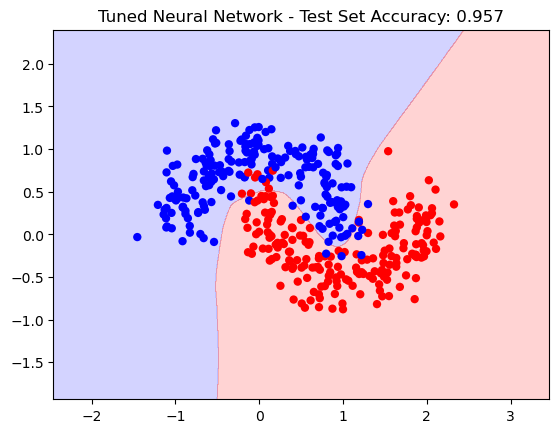

In [16]:
import matplotlib.cm
cmap = plt.get_cmap('bwr')

# Define region of interest by data limits
xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
steps = 1000
x_span = np.linspace(xmin, xmax, steps)
y_span = np.linspace(ymin, ymax, steps)
xx, yy = np.meshgrid(x_span, y_span)

# Make predictions across region of interest
labels = model.predict(np.c_[xx.ravel(), yy.ravel()])
labels_class = np.where(labels[:, 1] >= .50, 1, 0)

# Plot decision boundary in region of interest
z = labels_class.reshape(xx.shape)

fig, ax = plt.subplots()
ax.contourf(xx, yy, z, cmap=cmap, alpha=0.2)

# Get predicted labels on training data and plot
train_labels = model.predict(X_test)
plt.title('Tuned Neural Network - Test Set Accuracy: ' + str(round(test_accuracy, 3)))
ax.scatter(X_test[:,0], X_test[:,1], c=y_test[:, 1], cmap=cmap, lw=0);